# Lab 02

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

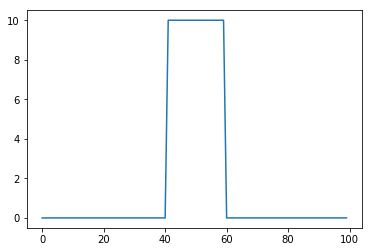

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 100 # sample count
startX = 40  
endX = 60
x = np.arange(N)
x = ((x < endX) * (x> startX))*10
plt.plot(x);

Let's create a triangular signal.

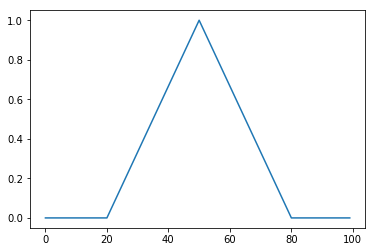

In [38]:
y = np.zeros(100)
heightY = 1.0
startY = 20
endY = 80
widthY = (endY - startY)/2.0
for i in range(startY,N/2):
 y[i] =  (i - startY) * (heightY / widthY) 
for i in range(N/2,endY):
 y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

Now let's apply two operations on the inputs and compare results.

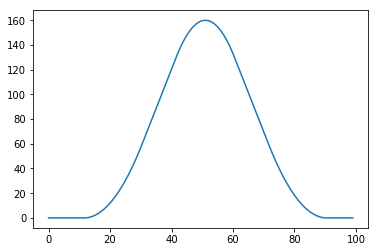

In [39]:
from scipy.signal import convolve
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

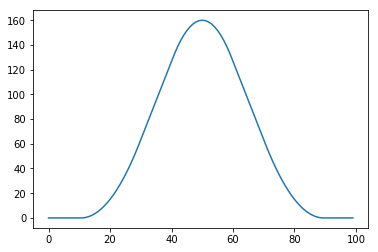

In [40]:
from scipy.signal import correlate
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

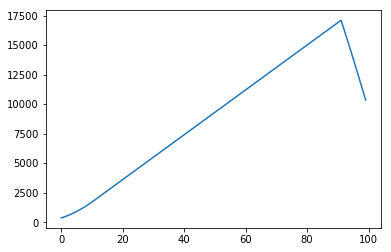

In [41]:
z = np.arange(N)

x_conv_as = convolve(x,z,'same')
plt.plot(x_conv_as);

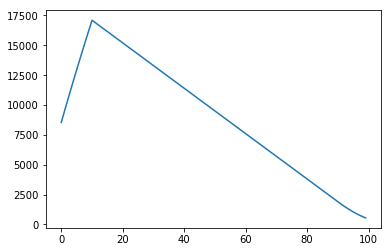

In [42]:
x_corr_as = correlate(x,z,'same')
plt.plot(x_corr_as);

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [84]:
%%capture
orig = np.random.uniform(0,10,1200)
h = plt.hist(orig, bins=120, normed=True);
orig = h[0]
t = h[1]
xconv = np.copy(orig)

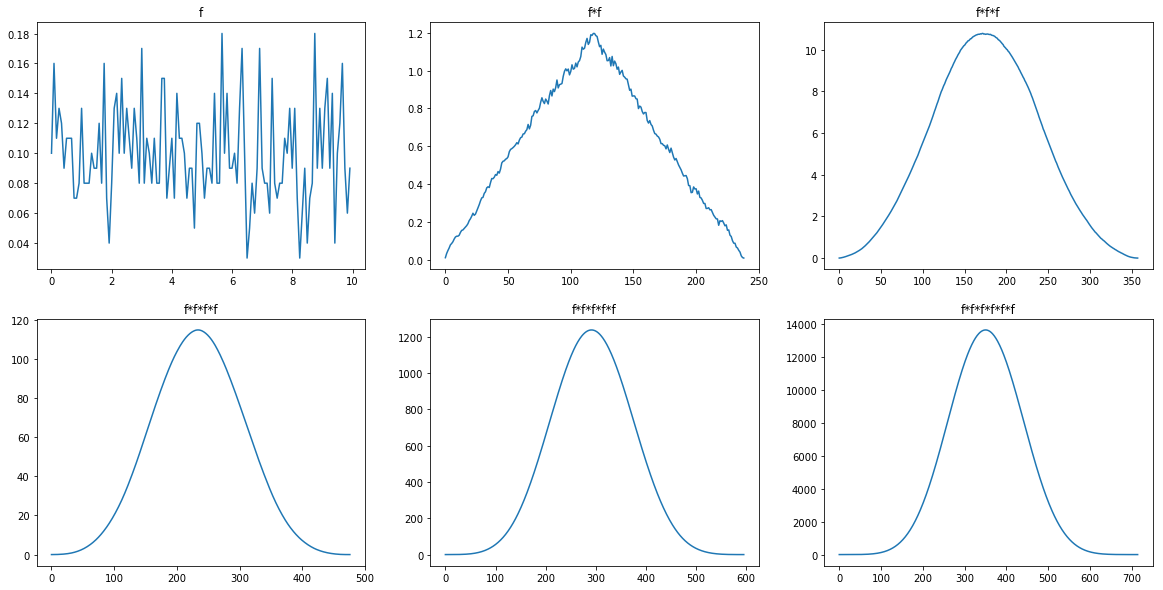

In [44]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig);
for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i+2)
    ax.set_title(("f*"*(i+2))[:-1])
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [45]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data.fillna(data.mean(), inplace=True)
data.corr()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,0.168519,0.123772,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,0.168519,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,0.123772,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [46]:
data.cov()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,136.666667,-94.051282,-66.666667,-97.500000,45.052632,5.705457,-1.180682e+05
FSIQ,-94.051282,579.946154,538.376923,505.501282,-27.310391,-7.993097,6.225462e+05
VIQ,-66.666667,538.376923,557.720513,412.939744,-38.878543,-6.482117,5.760814e+05
PIQ,-97.500000,505.501282,412.939744,504.948077,1.264507,-6.686325,6.282894e+05
Weight,45.052632,-27.310391,-38.878543,1.264507,522.971660,62.237382,8.297610e+05
Height,5.705457,-7.993097,-6.482117,-6.686325,62.237382,15.548060,1.713821e+05
MRI_Count,-118068.230769,622546.153846,576081.435897,628289.384615,829761.016194,171382.098817,5.224695e+09


As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [56]:
import scipy 
scipy.stats.pearsonr(data['Height'], data['Weight'])

(0.69019868434268938, 8.3248094149178698e-07)

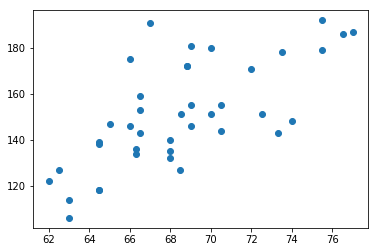

In [48]:
plt.scatter(data['Height'], data['Weight']);

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

In [91]:
# compute demeaned correlation divided by n-1 using scipy.signal
x1 = np.random.uniform(0,10,1200)
y1 = np.random.uniform(0,10,1200)

x1_len = len(x1)
x1_mean = np.mean(x1)
y1_mean = np.mean(y1)
x_corr1 = correlate(x1 - x1_mean, y1 - y1_mean,'same') / x1_len
x_corr1


array([-0.03782206,  0.15497574, -0.05255165, ..., -0.10880759,
        0.12868624, -0.33333331])

In [87]:
# compute covariance using numpy
np.cov(x1, y1)

array([[ 8.7322126 ,  0.07881911],
       [ 0.07881911,  8.50007826]])

### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [74]:
def pearsonr(x, y):
    x_n = len(x)
    y_n = len(y)
    df = x_n + y_n - 2
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    r = np.dot((x - x_mean), (y - y_mean)) / np.sqrt(np.sum(np.power((x - x_mean), 2)) * np.sum(np.power((y - y_mean), 2)))
    t = (x_mean - y_mean) / (np.power(x_std, 2) / x_n + np.power(y_std, 2)/ y_n)
    p = scipy.stats.t.sf(np.abs(t), df) * 2
    return r, p

pearsonr(data['Height'], data['Weight'])

(0.69019868434268961, 1.7267611240969757e-08)